In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kf import KF

I am given $z_{k} = Hx + \epsilon_{k}$, where $\epsilon_{k}$ is noise on my state vector and $H$ is my observation matrix, which transforms my state vector into the observation domain 

Usually, $H = [1, 0]$ for position-based state vectors since you can't directly observe velo

"The time update equations are responsible for projecting forward the current state and error covariance estimates to obtain the a priori estimates for the next time step. The measurement update equations are responsible for improving the a posteriori estimate by incorporating a new measurement into the a priori estimate."


# Task: use Kalman Filters to track a 1D moving object 

The object's movement can be modelled with function $$f(t) = 0.1(t^2 - t)$$
$$f(t) = 0.1(t - 0)(t - 1)$$

task: track that object using the Kalman Filter from $t=0$ to $t=100$

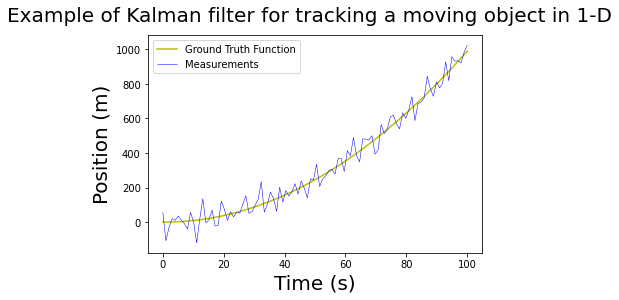

In [2]:
DT = 0.1
H = np.array([[1, 0]])
t = np.linspace(0,100,100)
f_t = 0.1 * (t**2 - t)
measurements = [x + np.random.normal(0, 50) for x in f_t]

fig = plt.figure()
fig.suptitle('Example of Kalman filter for tracking a moving object in 1-D', fontsize=20)
plt.plot(t, f_t, label='Ground Truth Function', color='y', linewidth=1.5)
plt.plot(t, np.array(measurements), label='Measurements', color='b',linewidth=0.5)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Position (m)', fontsize=20)
plt.legend()
plt.show()

In [15]:
DT = 0.1

t = np.arange(0, 100, DT)
f_t = 0.1*(t**2 - t)
kf = KF(initial_x=0, initial_v=0.1, dt=DT, std_a=1.3, std_z=25)

predictions = []
measurements = np.array([x + np.random.normal(0, kf.std_z) for x in f_t])
for z_k in measurements:

        kf.predict()
        predictions.append(kf.X) 
        kf.update(z_k)

predictions

[array([[0.01],
        [0.1 ]]),
 array([[-0.90201354],
        [ 0.00902765]]),
 array([[-0.39328262],
        [ 0.10791325]]),
 array([[-0.9392095 ],
        [-0.04954693]]),
 array([[-1.3083117 ],
        [-0.18033096]]),
 array([[-1.92400121],
        [-0.43234254]]),
 array([[-2.36014341],
        [-0.617049  ]]),
 array([[-1.13854428],
        [ 0.03158177]]),
 array([[-1.79544659],
        [-0.31784472]]),
 array([[-2.50512216],
        [-0.68656564]]),
 array([[-2.48463407],
        [-0.63744728]]),
 array([[-1.0252999 ],
        [ 0.20381279]]),
 array([[-2.65793611],
        [-0.70439555]]),
 array([[-3.98248464],
        [-1.38591466]]),
 array([[-2.59043227],
        [-0.56658255]]),
 array([[-2.46908211],
        [-0.47300142]]),
 array([[-0.19005086],
        [ 0.72563786]]),
 array([[-0.55017706],
        [ 0.50743167]]),
 array([[-0.55929971],
        [ 0.47790774]]),
 array([[-1.65500907],
        [-0.07333573]]),
 array([[0.41452439],
        [0.9051852 ]]),
 array([

In [17]:
preds = np.array(predictions)

In [35]:
a = kf.H.dot(preds)
np.set_printoptions(precision=3)
a.flatten().shape


(1000,)